<a href="https://colab.research.google.com/github/nithinporandla/rinexprojects/blob/main/major_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#1. Take data and create a DATAFRAME

import pandas as pd
df = pd.read_csv('/content/bikes_dataset.csv')
df

,bike_name,city,kms_driven,owner,age,power,brand,price
0,TVS Star City Plus Dual Tone 110cc,Ahmedabad,17654,First Owner,3,110,TVS,35000
1,Royal Enfield Classic 350cc,Delhi,11000,First Owner,4,350,Royal Enfield,119900
2,Triumph Daytona 675R,Delhi,110,First Owner,8,675,Triumph,600000
3,TVS Apache RTR 180cc,Bangalore,16329,First Owner,4,180,TVS,65000
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,Bangalore,10000,First Owner,3,150,Yamaha,80000
...,...,...,...,...,...,...,...,...
32643,Hero Passion Pro 100cc,Delhi,22000,First Owner,4,100,Hero,39000
32644,TVS Apache RTR 180cc,Karnal,6639,First Owner,9,180,TVS,30000
32645,Bajaj Avenger Street 220,Delhi,20373,First Owner,6,220,Bajaj,60000
32646,Hero Super Splendor 125cc,Jaipur,84186,First Owner,16,125,Hero,15600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   bike_name   32648 non-null  object
 1   city        32648 non-null  object
 2   kms_driven  32648 non-null  int64 
 3   owner       32648 non-null  object
 4   age         32648 non-null  int64 
 5   power       32648 non-null  int64 
 6   brand       32648 non-null  object
 7   price       32648 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 2.0+ MB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


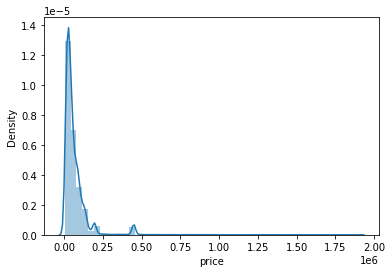

In [5]:
#3.DATA VISUALISATION
import seaborn as sns
sns.distplot(df['price']) #distribution plot

In [6]:
#We want to consider only the numeric data
#So we will create a new dataframe with only numeric data
df_numeric = df.select_dtypes(include = ['float64','int64'])
df_numeric

,kms_driven,age,power,price
0,17654,3,110,35000
1,11000,4,350,119900
2,110,8,675,600000
3,16329,4,180,65000
4,10000,3,150,80000
...,...,...,...,...
32643,22000,4,100,39000
32644,6639,9,180,30000
32645,20373,6,220,60000
32646,84186,16,125,15600


In [7]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   kms_driven  32648 non-null  int64
 1   age         32648 non-null  int64
 2   power       32648 non-null  int64
 3   price       32648 non-null  int64
dtypes: int64(4)
memory usage: 1020.4 KB


In [8]:
# 4.Divide into Input and Output

In [9]:
#INPUT VALUES - Acceleration, Top speed, Range
x = df_numeric.iloc[:,0:3].values
x

array([[17654,     3,   110],
       [11000,     4,   350],
       [  110,     8,   675],
       ...,
       [20373,     6,   220],
       [84186,    16,   125],
       [60857,    13,   150]])

In [10]:
#OUTPUT VALUES - Efficiency
y = df_numeric.iloc[:,3]
y

0         35000
1        119900
2        600000
3         65000
4         80000
          ...  
32643     39000
32644     30000
32645     60000
32646     15600
32647     22000
Name: price, Length: 32648, dtype: int64

In [11]:
#5.TRAIN and TEST VARIABLES

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [12]:
print(x.shape)        #326458rows and 3columns
print(x_train.shape)  #24486 rows and 3columns
print(x_test.shape)   #8162 rows and 3columns

(32648, 3)
(24486, 3)
(8162, 3)


In [13]:
print(y.shape)       #32648 rows and 1 column   
print(y_train.shape) #24486 rows and 1 column
print(y_test.shape)  #8162 rows and 1 column

(32648,)
(24486,)
(8162,)


In [14]:
# 6. SCALING or NORMALISATION 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [15]:
#7.RUN a CLASSIFIER/REGRESSOR/CLUSTERER
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [16]:
 #8.MODEL FITTING
model.fit(x_train,y_train)

LinearRegression()

In [17]:
#9.PREDICT THE OUTPUT
y_pred = model.predict(x_test)#By taking the input testing data , we predict the output
y_pred #PREDICTED VALUES

array([ 57384.1278106 ,  70086.48541076, 400089.34260216, ...,
        81217.86485684, 400089.34260216, 180899.22856043])

In [18]:
y_test #ACTUAL VALUES

9763      87000
28214     41000
24114    450000
16697     70000
12930    105000
          ...  
25146     55005
29317     18000
1986     120000
31790    450000
8870     140900
Name: price, Length: 8162, dtype: int64

In [19]:

print(x_train[10]) #these are scaled/normalised values

[0.03043071 0.11290323 0.        ]


In [20]:
  #10.INDIVIDUAL PREDICTION
model.predict([x_train[10]])

array([6580.70465838])